In [1]:
import pandas as pd
import numpy as np

## Load Data

In [2]:
df_raw = pd.read_csv('Data/export.csv')

In [3]:
df = df_raw.copy()

In [4]:
display(df.head(3),df.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Derived AJCC T, 6th ed (2004-2015)","Derived AJCC N, 6th ed (2004-2015)","Derived AJCC M, 6th ed (2004-2015)","Derived AJCC Stage Group, 6th ed (2004-2015)",...,Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),CS tumor size (2004-2015),Tumor Size Summary (2016+),Survival months
0,840290,70-74 years,Married (including common law),2004,Female,White,T2,N0,M1,IV,...,Blank(s),Blank(s),Blank(s),Blank(s),Yes,None/Unknown,NaN,025,Blank(s),0008
1,960311,65-69 years,Separated,2004,Male,White,T3a,N1,M0,IV,...,Blank(s),Blank(s),Blank(s),Blank(s),Yes,None/Unknown,NaN,999,Blank(s),0053
2,9035323,55-59 years,Single (never married),2004,Female,Asian or Pacific Islander,T4,N3,M1,IV,...,Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,None/Unknown,NaN,999,Blank(s),0006


(1619, 28)

<Axes: xlabel='Year of diagnosis'>

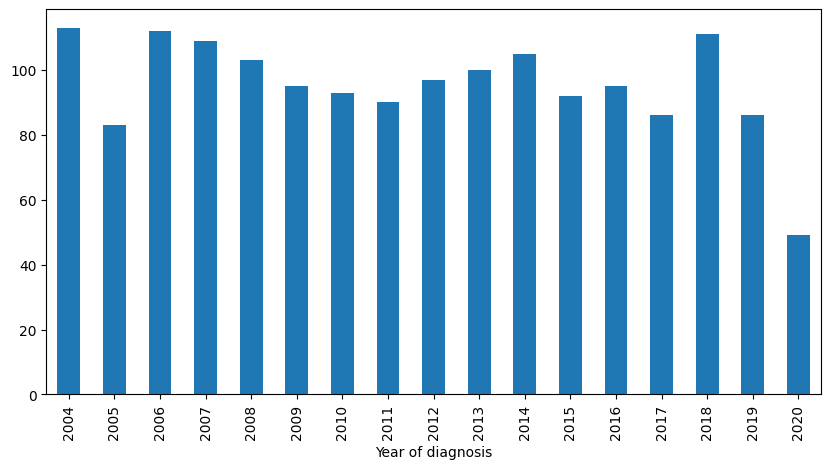

In [5]:
df['Year of diagnosis'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(10, 5))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Patient ID                                    1619 non-null   int64 
 1   Age recode with <1 year olds                  1619 non-null   object
 2   Marital status at diagnosis                   1619 non-null   object
 3   Year of diagnosis                             1619 non-null   int64 
 4   Sex                                           1619 non-null   object
 5   Race recode (W, B, AI, API)                   1619 non-null   object
 6   Derived AJCC T, 6th ed (2004-2015)            1604 non-null   object
 7   Derived AJCC N, 6th ed (2004-2015)            1604 non-null   object
 8   Derived AJCC M, 6th ed (2004-2015)            1604 non-null   object
 9   Derived AJCC Stage Group, 6th ed (2004-2015)  1604 non-null   object
 10  

## Separate the data into two parts: 2004-2015 and 2018-2020

In [7]:
df1 = df[df['Year of diagnosis'].between(2004, 2015)]
# Drop the out-of-range columns
drop_cols1 = ['Derived AJCC T, 7th ed (2010-2015)','Derived AJCC N, 7th ed (2010-2015)','Derived AJCC M, 7th ed (2010-2015)', 
              'Derived AJCC Stage Group, 7th ed (2010-2015)','Derived SEER Combined T (2016-2017)','Derived SEER Combined N (2016-2017)',
              'Derived SEER Combined M (2016-2017)','Derived SEER Cmb Stg Grp (2016-2017)','Derived EOD 2018 T (2018+)',
              'Derived EOD 2018 N (2018+)','Derived EOD 2018 M (2018+)','Derived EOD 2018 Stage Group (2018+)','Tumor Size Summary (2016+)']
df1 = df1.drop(columns=drop_cols1)

df2 = df[df['Year of diagnosis']>= 2018]
# Drop the out-of-range columns
drop_cols2 = ['Derived AJCC T, 6th ed (2004-2015)', 'Derived AJCC N, 6th ed (2004-2015)','Derived AJCC M, 6th ed (2004-2015)', 'Derived AJCC Stage Group, 6th ed (2004-2015)',
              'Derived AJCC T, 7th ed (2010-2015)','Derived AJCC N, 7th ed (2010-2015)','Derived AJCC M, 7th ed (2010-2015)',
              'Derived AJCC Stage Group, 7th ed (2010-2015)','Derived SEER Combined T (2016-2017)','Derived SEER Combined N (2016-2017)',
              'Derived SEER Combined M (2016-2017)','Derived SEER Cmb Stg Grp (2016-2017)','CS tumor size (2004-2015)']
df2 = df2.drop(columns=drop_cols2)

In [8]:
display(df1.head(3),df1.shape,df2.head(3),df2.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Derived AJCC T, 6th ed (2004-2015)","Derived AJCC N, 6th ed (2004-2015)","Derived AJCC M, 6th ed (2004-2015)","Derived AJCC Stage Group, 6th ed (2004-2015)","Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),CS tumor size (2004-2015),Survival months
0,840290,70-74 years,Married (including common law),2004,Female,White,T2,N0,M1,IV,Yes,None/Unknown,NaN,025,0008
1,960311,65-69 years,Separated,2004,Male,White,T3a,N1,M0,IV,Yes,None/Unknown,NaN,999,0053
2,9035323,55-59 years,Single (never married),2004,Female,Asian or Pacific Islander,T4,N3,M1,IV,No/Unknown,None/Unknown,NaN,999,0006


(1192, 15)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Year of diagnosis,Sex,"Race recode (W, B, AI, API)",Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),Tumor Size Summary (2016+),Survival months
1373,24474114,85+ years,Widowed,2018,Male,White,88,88,88,88,No/Unknown,None/Unknown,NaN,999,0004
1374,50247258,50-54 years,Married (including common law),2018,Male,White,T0,N3,M1c,4B,Yes,Beam radiation,NaN,000,0005
1375,11279220,75-79 years,Divorced,2018,Male,White,T1b,N0,M0,1A2,Yes,Beam radiation,NaN,020,0025


(246, 15)

## Data Cleaning

### Age
SEER database collection

In [9]:
df1['Age recode with <1 year olds'].value_counts(dropna=False).sort_index()

Age recode with <1 year olds
25-29 years      2
30-34 years      1
35-39 years      3
40-44 years     15
45-49 years     39
50-54 years     76
55-59 years    120
60-64 years    152
65-69 years    223
70-74 years    199
75-79 years    175
80-84 years    130
85+ years       57
Name: count, dtype: int64

In [10]:
df2['Age recode with <1 year olds'].value_counts(dropna=False).sort_index()

Age recode with <1 year olds
35-39 years     2
45-49 years     4
50-54 years     2
55-59 years    18
60-64 years    32
65-69 years    48
70-74 years    49
75-79 years    34
80-84 years    33
85+ years      24
Name: count, dtype: int64

In [11]:
# Define a mapping function
def group_ages1(age):
    if age in [ '25-29 years','30-34 years','35-39 years']:
        return '25-39 years'
    else:
        return age
    
def group_ages2(age):
    if age in [ '35-39 years','45-49 years','50-54 years']:
        return '35-54 years'
    else:
        return age

In [12]:
# Apply the mapping function to the age column
df1['Age recode with <1 year olds'] = df1['Age recode with <1 year olds'].astype(str)
df1['Age'] = df1['Age recode with <1 year olds'].apply(group_ages1)

df2['Age recode with <1 year olds'] = df2['Age recode with <1 year olds'].astype(str)
df2['Age'] = df2['Age recode with <1 year olds'].apply(group_ages2)

# Drop the original age column
df1 = df1.drop(columns=['Age recode with <1 year olds'])
df2 = df2.drop(columns=['Age recode with <1 year olds'])

### Marital Status

In [188]:
def categorize_marital_status(df, column_name):
    # Define the mapping for each status to its group
    status_mapping = {
        'Married (including common law)': 'Married',
        'Unmarried or Domestic Partner': 'Married',  
        'Single (never married)': 'Single (never married)',
        'Separated': 'Single',  
        'Divorced': 'Single',   
        'Widowed': 'Single',    
        'Unknown': 'Unknown/Other'
    }

    # Apply the mapping to the specified column
    df['Marital Status'] = df[column_name].map(status_mapping).fillna('Unknown/Other')

    return df

# Apply the function to the 'Marital status at diagnosis' column
df1 = categorize_marital_status(df1, 'Marital status at diagnosis')
df2 = categorize_marital_status(df2, 'Marital status at diagnosis')

# drop old column
df1.drop(columns='Marital status at diagnosis', inplace=True)
df2.drop(columns='Marital status at diagnosis', inplace=True)

### Sex

In [189]:
df1['Sex'].value_counts(dropna=False)

Sex
Male      703
Female    489
Name: count, dtype: int64

In [190]:
df2['Sex'].value_counts(dropna=False)

Sex
Male      156
Female     90
Name: count, dtype: int64

In [191]:
# binary encoding
df1['Sex_is_male'] = df1['Sex'].map({'Male': 1, 'Female': 0})
df2['Sex_is_male'] = df2['Sex'].map({'Male': 1, 'Female': 0})

# drop old column
df1.drop(columns=['Sex'], inplace=True)
df2.drop(columns=['Sex'], inplace=True)

### Race

In [192]:
df1['Race recode (W, B, AI, API)'].value_counts(dropna=False)

Race recode (W, B, AI, API)
White                            1037
Black                             116
Asian or Pacific Islander          33
American Indian/Alaska Native       6
Name: count, dtype: int64

In [193]:
df2['Race recode (W, B, AI, API)'].value_counts(dropna=False)

Race recode (W, B, AI, API)
White                            206
Black                             27
Asian or Pacific Islander          8
American Indian/Alaska Native      5
Name: count, dtype: int64

In [194]:
# Group Asian or Pacific Islander and American Indian/Alaska Native as Other
df1['Race']= df1['Race recode (W, B, AI, API)'].replace({
        'Asian or Pacific Islander': 'Other', 
        'American Indian/Alaska Native': 'Other'})
df2['Race']= df2['Race recode (W, B, AI, API)'].replace({
        'Asian or Pacific Islander': 'Other', 
        'American Indian/Alaska Native': 'Other'})

# drop old column
df1.drop('Race recode (W, B, AI, API)', axis=1, inplace=True)
df2.drop('Race recode (W, B, AI, API)', axis=1, inplace=True)

In [195]:
df1['Race'].value_counts(dropna=False)

Race
White    1037
Black     116
Other      39
Name: count, dtype: int64

In [196]:
df2['Race'].value_counts(dropna=False)

Race
White    206
Black     27
Other     13
Name: count, dtype: int64

### Chemotherapy recode (yes, no/unk)

In [197]:
# map Chemotherapy recode (yes, no/unk) into 1: Yes and 0:No/Unknown
df1['Chemotherapy'] = df1['Chemotherapy recode (yes, no/unk)'].map({'Yes': 1, 'No/Unknown': 0})
df2['Chemotherapy'] = df2['Chemotherapy recode (yes, no/unk)'].map({'Yes': 1, 'No/Unknown': 0})

# drop old column
df1.drop('Chemotherapy recode (yes, no/unk)', axis=1, inplace=True)
df2.drop('Chemotherapy recode (yes, no/unk)', axis=1, inplace=True)

In [198]:
display(df1['Chemotherapy'].value_counts(dropna=False),df2['Chemotherapy'].value_counts(dropna=False))

Chemotherapy
1    719
0    473
Name: count, dtype: int64

Chemotherapy
1    141
0    105
Name: count, dtype: int64

### Radiation

In [199]:
display(df1['Radiation recode'].value_counts(dropna=False),df2['Radiation recode'].value_counts(dropna=False))

Radiation recode
None/Unknown                                             661
Beam radiation                                           483
Refused (1988+)                                           19
Recommended, unknown if administered                      14
Radiation, NOS  method or source not specified            10
Radioactive implants (includes brachytherapy) (1988+)      3
Combination of beam with implants or isotopes              2
Name: count, dtype: int64

Radiation recode
None/Unknown                            161
Beam radiation                           72
Refused (1988+)                          10
Recommended, unknown if administered      3
Name: count, dtype: int64

In [200]:
def map_radiation_values(value):
    # Define the values to be mapped to 0
    values_for_zero = ['None/Unknown', 'Refused (1988+)',
                        'Recommended, unknown if administered']
    
    # Check if the value is in the list for 0, else return 1
    return 0 if value in values_for_zero else 1

# Apply the function to the 'Radiation Recode' column
df1['Radiation recode'] = df1['Radiation recode'].apply(map_radiation_values)
df2['Radiation recode'] = df2['Radiation recode'].apply(map_radiation_values)

In [201]:
display(df1['Radiation recode'].value_counts(dropna=False),df2['Radiation recode'].value_counts(dropna=False))

Radiation recode
0    694
1    498
Name: count, dtype: int64

Radiation recode
0    174
1     72
Name: count, dtype: int64

### RX Summ--Scope Reg LN Sur (2003+)

In [202]:
display(df1['RX Summ--Scope Reg LN Sur (2003+)'].value_counts(dropna=False),df2['RX Summ--Scope Reg LN Sur (2003+)'].value_counts(dropna=False))

RX Summ--Scope Reg LN Sur (2003+)
NaN                                                           842
4 or more regional lymph nodes removed                        156
Biopsy or aspiration of regional lymph node, NOS               92
1 to 3 regional lymph nodes removed                            65
Unknown or not applicable                                      25
Number of regional lymph nodes removed unknown                 11
Sentinel node biopsy and lym nd removed same/unstated time      1
Name: count, dtype: int64

RX Summ--Scope Reg LN Sur (2003+)
NaN                                                 171
Biopsy or aspiration of regional lymph node, NOS     41
4 or more regional lymph nodes removed               26
1 to 3 regional lymph nodes removed                   4
Unknown or not applicable                             3
Number of regional lymph nodes removed unknown        1
Name: count, dtype: int64

In [203]:
# NaN and Unknown or not applicable will be 0, the rest will be 1
df1['Surgery'] = np.where(df1['RX Summ--Scope Reg LN Sur (2003+)'].isna() | 
                            (df1['RX Summ--Scope Reg LN Sur (2003+)'] == 'Unknown or not applicable'), 0, 1)
df2['Surgery'] = np.where(df2['RX Summ--Scope Reg LN Sur (2003+)'].isna() |
                            (df2['RX Summ--Scope Reg LN Sur (2003+)'] == 'Unknown or not applicable'), 0, 1)

# drop old column
df1.drop(columns='RX Summ--Scope Reg LN Sur (2003+)', inplace=True)
df2.drop(columns='RX Summ--Scope Reg LN Sur (2003+)', inplace=True)

In [204]:
display(df1['Surgery'].value_counts(dropna=False),df2['Surgery'].value_counts(dropna=False))

Surgery
0    867
1    325
Name: count, dtype: int64

Surgery
0    174
1     72
Name: count, dtype: int64

### T, N, M Transformation

In [205]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1191
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Patient ID                                    1192 non-null   int64 
 1   Year of diagnosis                             1192 non-null   int64 
 2   Derived AJCC T, 6th ed (2004-2015)            1177 non-null   object
 3   Derived AJCC N, 6th ed (2004-2015)            1177 non-null   object
 4   Derived AJCC M, 6th ed (2004-2015)            1177 non-null   object
 5   Derived AJCC Stage Group, 6th ed (2004-2015)  1177 non-null   object
 6   Radiation recode                              1192 non-null   int64 
 7   CS tumor size (2004-2015)                     1192 non-null   object
 8   Survival months                               1192 non-null   object
 9   Age                                           1192 non-null   object
 10  Marit

None

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 1373 to 1618
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Patient ID                            246 non-null    int64 
 1   Year of diagnosis                     246 non-null    int64 
 2   Derived EOD 2018 T (2018+)            246 non-null    object
 3   Derived EOD 2018 N (2018+)            246 non-null    object
 4   Derived EOD 2018 M (2018+)            246 non-null    object
 5   Derived EOD 2018 Stage Group (2018+)  246 non-null    object
 6   Radiation recode                      246 non-null    int64 
 7   Tumor Size Summary (2016+)            246 non-null    object
 8   Survival months                       246 non-null    object
 9   Age                                   246 non-null    object
 10  Marital Status                        246 non-null    object
 11  Sex_is_male                      

### T

In [207]:
display(df1['Derived AJCC T, 6th ed (2004-2015)'].value_counts(dropna=False).sort_index(),
        df2['Derived EOD 2018 T (2018+)'].value_counts(dropna=False).sort_index())

Derived AJCC T, 6th ed (2004-2015)
T0         6
T1       182
T1NOS      1
T1b        6
T1c        1
T2       302
T2NOS     18
T2a       13
T2b        8
T2c        5
T3        62
T3NOS      5
T3a        8
T3b       11
T3c        1
T4       418
T4a        8
T4b        3
TX       118
Tis        1
NaN       15
Name: count, dtype: int64

Derived EOD 2018 T (2018+)
88      76
T0       4
T1a      1
T1b      8
T1c     11
T1mi     3
T2a     34
T2b     11
T3      22
T4      58
T4b      1
TX      17
Name: count, dtype: int64

In [208]:
df2[df2['Derived EOD 2018 T (2018+)'] =='88']

,Patient ID,Year of diagnosis,Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),Radiation recode,Tumor Size Summary (2016+),Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery
1373,24474114,2018,88,88,88,88,0,999,0004,85+ years,Single,1,White,0,0
1377,11270282,2018,88,88,88,88,0,058,0007,70-74 years,Married,1,White,1,0
1384,63020463,2018,88,88,88,88,0,050,0026,60-64 years,Married,0,White,1,1
1388,11116654,2018,88,88,88,88,0,053,0016,70-74 years,Married,1,White,1,1
1389,35018410,2018,88,88,88,88,0,999,0004,80-84 years,Married,1,White,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,37076784,2020,88,88,88,88,0,999,0006,60-64 years,Single,1,White,0,0
1597,37064309,2020,88,88,88,88,0,110,0000,70-74 years,Married,1,White,0,0
1600,49567779,2020,88,88,88,88,0,050,0002,85+ years,Single,0,White,0,0
1611,27903774,2020,88,88,88,88,0,999,0002,75-79 years,Single,0,Black,0,0


In [209]:
# drop NaN and 88
df1 = df1[df1['Derived AJCC T, 6th ed (2004-2015)'].notna()]
df2 = df2[df2['Derived EOD 2018 T (2018+)'] != '88']

df1['T'] = df1['Derived AJCC T, 6th ed (2004-2015)'].str.extract(r'(T\d|TX|Tis)')
df2['T'] = df2['Derived EOD 2018 T (2018+)'].str.extract(r'(T\d|TX|Tis)')

In [210]:
display(df1['T'].value_counts(dropna=False).sort_index(),df2['T'].value_counts(dropna=False).sort_index())

T
T0       6
T1     190
T2     346
T3      87
T4     429
TX     118
Tis      1
Name: count, dtype: int64

T
T0     4
T1    23
T2    45
T3    22
T4    59
TX    17
Name: count, dtype: int64

### N

In [211]:
display(df1['Derived AJCC N, 6th ed (2004-2015)'].value_counts(dropna=False).sort_index(),
        df2['Derived EOD 2018 N (2018+)'].value_counts(dropna=False).sort_index())

Derived AJCC N, 6th ed (2004-2015)
N0     352
N1     129
N2     457
N2a      1
N2b      2
N2c      1
N3     145
NX      90
Name: count, dtype: int64

Derived EOD 2018 N (2018+)
N0    39
N1    11
N2    70
N3    43
NX     7
Name: count, dtype: int64

In [212]:
# drop NaN and 88
df1 = df1[df1['Derived AJCC N, 6th ed (2004-2015)'].notna()]
df2 = df2[df2['Derived EOD 2018 N (2018+)'] != '88']

df1['N'] = df1['Derived AJCC N, 6th ed (2004-2015)'].str.extract(r'(N\d|NX)')
df2['N'] = df2['Derived EOD 2018 N (2018+)'].str.extract(r'(N\d|NX)')

In [213]:
display(df1['N'].value_counts(dropna=False).sort_index(),df2['N'].value_counts(dropna=False).sort_index())

N
N0    352
N1    129
N2    461
N3    145
NX     90
Name: count, dtype: int64

N
N0    39
N1    11
N2    70
N3    43
NX     7
Name: count, dtype: int64

### M

In [214]:
display(df1['Derived AJCC M, 6th ed (2004-2015)'].value_counts(dropna=False).sort_index(),
        df2['Derived EOD 2018 M (2018+)'].value_counts(dropna=False).sort_index())

Derived AJCC M, 6th ed (2004-2015)
M0       530
M1       568
M1NOS      2
M1a        4
M1b       17
M1c        9
MX        47
Name: count, dtype: int64

Derived EOD 2018 M (2018+)
M0     64
M1      7
M1a    19
M1b    21
M1c    59
Name: count, dtype: int64

In [215]:
# drop NaN and 88
df1 = df1[df1['Derived AJCC M, 6th ed (2004-2015)'].notna()]
df2 = df2[df2['Derived EOD 2018 M (2018+)'] != '88']

df1['M'] = df1['Derived AJCC M, 6th ed (2004-2015)'].str.extract(r'(M\d|MX)')
df2['M'] = df2['Derived EOD 2018 M (2018+)'].str.extract(r'(M\d|MX)')

In [216]:
display(df1['M'].value_counts(dropna=False).sort_index(),df2['M'].value_counts(dropna=False).sort_index())

M
M0    530
M1    600
MX     47
Name: count, dtype: int64

M
M0     64
M1    106
Name: count, dtype: int64

### Stage

In [217]:
display(df1['Derived AJCC Stage Group, 6th ed (2004-2015)'].value_counts(dropna=False).sort_index(),
        df2['Derived EOD 2018 Stage Group (2018+)'].value_counts(dropna=False).sort_index())

Derived AJCC Stage Group, 6th ed (2004-2015)
0is            1
I              5
IA            55
IB            62
II            20
IIA           23
IIB           39
III           19
IIIA         120
IIIB         152
IIIC           3
IV           601
IVA            4
IVB           11
IVC            1
IVNOS          2
OCCULT         9
UNK Stage     50
Name: count, dtype: int64

Derived EOD 2018 Stage Group (2018+)
1A1     2
1A2     1
1A3     4
1B      6
2B      5
3       3
3A     22
3B     11
3C      5
4       7
4A     40
4B     60
99      4
Name: count, dtype: int64

In [218]:
# drop NaN for df1
df1 = df1[df1['Derived AJCC Stage Group, 6th ed (2004-2015)'].notna()]

def group_stage(value):
    if value in ['0is', 'OCCULT', 'UNK Stage']:
        return 'Other'
    elif value.startswith('I') and not value.startswith('II') and not value.startswith('IV'):
        return 'I'
    elif value.startswith('II') and not value.startswith('III'):
        return 'II'
    elif value.startswith('III'):
        return 'III'
    elif value.startswith('IV'):
        return 'IV'
    else:
        return 'Other'  # Catch-all for any values not explicitly matched
    
df1['Grouped Stage'] = df1['Derived AJCC Stage Group, 6th ed (2004-2015)'].apply(group_stage)

df1['Grouped Stage'].value_counts(dropna=False).sort_index()

Grouped Stage
I        122
II        82
III      294
IV       619
Other     60
Name: count, dtype: int64

In [219]:
df2['Grouped Stage'] = df2['Derived EOD 2018 Stage Group (2018+)'].apply(lambda x: 'Other' if x == '99' else x[0])

df2['Grouped Stage'].value_counts(dropna=False).sort_index()

Grouped Stage
1         13
2          5
3         41
4        107
Other      4
Name: count, dtype: int64

In [220]:
# drop old columns
df1.drop(columns=['Derived AJCC T, 6th ed (2004-2015)', 'Derived AJCC N, 6th ed (2004-2015)', 'Derived AJCC M, 6th ed (2004-2015)', 'Derived AJCC Stage Group, 6th ed (2004-2015)'], inplace=True)
df2.drop(columns=['Derived EOD 2018 T (2018+)', 'Derived EOD 2018 N (2018+)', 'Derived EOD 2018 M (2018+)', 'Derived EOD 2018 Stage Group (2018+)'], inplace=True)

### Tumor size

In [221]:
df1.head(2)

,Patient ID,Year of diagnosis,Radiation recode,CS tumor size (2004-2015),Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage
0,840290,2004,0,025,0008,70-74 years,Married,0,White,1,0,T2,N0,M1,IV
1,960311,2004,0,999,0053,65-69 years,Single,1,White,1,0,T3,N1,M0,IV


In [222]:
df2.head(2)

,Patient ID,Year of diagnosis,Radiation recode,Tumor Size Summary (2016+),Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage
1374,50247258,2018,1,000,0005,35-54 years,Married,1,White,1,0,T0,N3,M1,4
1375,11279220,2018,1,020,0025,75-79 years,Single,1,White,1,0,T1,N0,M0,1


In [223]:
# Logic to combine the columns
df1['Tumor Size'] = df1['CS tumor size (2004-2015)']
df1['Tumor Size'] = df1['Tumor Size'].astype('int64')
df1['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
0        6
1        1
2        1
5        1
6        2
      ... 
991      1
992      1
994      3
996      1
999    308
Name: count, Length: 130, dtype: int64

<Axes: >

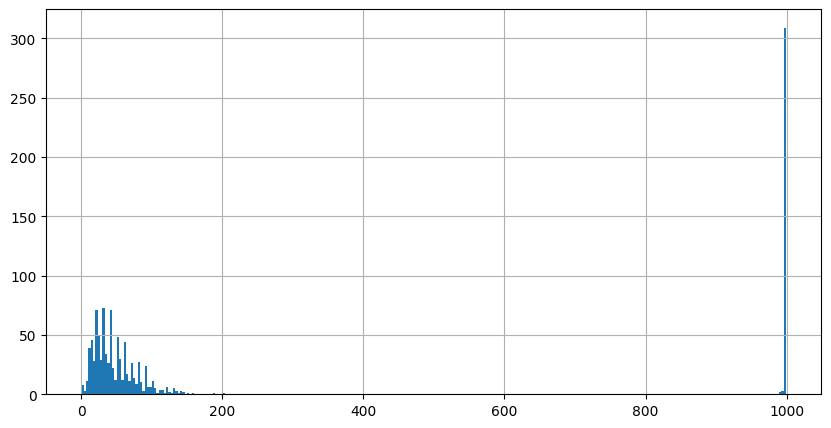

In [224]:
df1['Tumor Size'].hist(bins=300, figsize=(10, 5))

In [225]:
df2['Tumor Size'] = df2['Tumor Size Summary (2016+)']
df2['Tumor Size'] = df2['Tumor Size'].astype('int64')
df2['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
0       1
10      1
11      4
12      1
13      1
       ..
140     1
142     1
154     1
990     1
999    31
Name: count, Length: 74, dtype: int64

<Axes: >

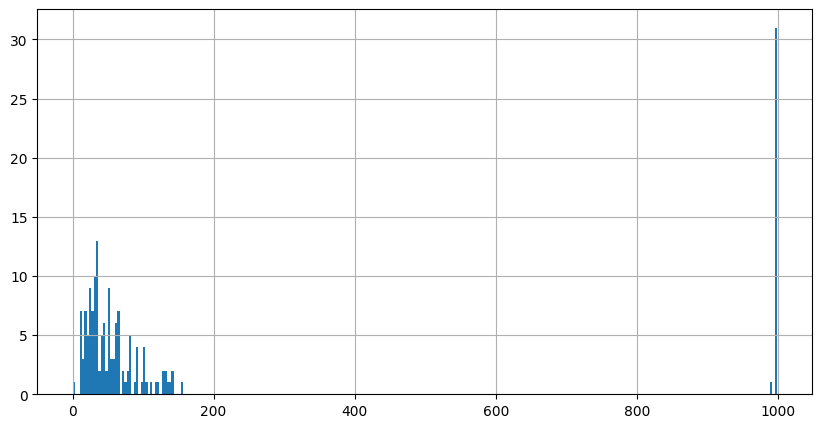

In [226]:
df2['Tumor Size'].hist(bins=300, figsize=(10, 5))

In [227]:
df1[df1['Tumor Size'] <= 988]['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
0      6
1      1
2      1
5      1
6      2
      ..
145    1
150    1
157    1
188    1
200    1
Name: count, Length: 125, dtype: int64

In [228]:
df1[df1['Tumor Size'] >= 989]['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
991      1
992      1
994      3
996      1
999    308
Name: count, dtype: int64

In [229]:
df1[df1['Tumor Size'] == 999][['T','N','M','Grouped Stage']].value_counts(dropna=False).sort_index()

T    N   M   Grouped Stage
T1   N0  M0  I                 3
         M1  IV                2
         MX  Other             1
     N1  M1  IV                2
     NX  M1  IV                1
                              ..
TX   N3  MX  Other             2
     NX  M0  Other             1
         M1  IV               14
         MX  Other            17
Tis  N0  M0  Other             1
Name: count, Length: 61, dtype: int64

In [230]:
df2[df2['Tumor Size'] <= 988]['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
0      1
10     1
11     4
12     1
13     1
      ..
136    1
137    1
140    1
142    1
154    1
Name: count, Length: 72, dtype: int64

In [231]:
df2[df2['Tumor Size'] >= 989]['Tumor Size'].value_counts(dropna=False).sort_index()

Tumor Size
990     1
999    31
Name: count, dtype: int64

In [232]:
df2[df2['Tumor Size'] == 999][['T','N','M','Grouped Stage']].value_counts(dropna=False).sort_index()

T   N   M   Grouped Stage
T0  N0  M1  4                1
    N2  M1  4                1
    N3  M1  4                1
T1  N2  M0  3                1
T2  N0  M0  1                1
        M1  4                1
    N2  M0  3                2
    N3  M1  4                1
T4  N0  M1  4                1
    N1  M0  3                1
    N2  M0  3                1
        M1  4                1
    N3  M1  4                3
    NX  M1  4                1
TX  N0  M0  Other            2
        M1  4                1
    N1  M1  4                1
    N2  M0  3                1
        M1  4                4
    N3  M0  3                1
        M1  4                1
    NX  M0  Other            2
        M1  4                1
Name: count, dtype: int64

In [233]:
# only keep the countinuous tumor size
df1 = df1[df1['Tumor Size'] <= 988]
df2 = df2[df2['Tumor Size'] <= 988]

In [234]:
df1.shape

(863, 16)

In [235]:
df2.shape

(138, 16)

### Survival months

In [236]:
df1['Survival months'].value_counts(dropna=False).sort_index()

Survival months
0000    72
0001    69
0002    47
0003    32
0004    40
        ..
0102     1
0103     1
0112     1
0119     1
0130     1
Name: count, Length: 79, dtype: int64

In [237]:
df2['Survival months'].value_counts(dropna=False).sort_index()

Survival months
0000    23
0001    13
0002    10
0003    10
0004     7
0005    11
0006     8
0007     7
0008     4
0009     5
0010     4
0011     7
0012    10
0013     1
0015     2
0017     4
0018     2
0019     2
0020     1
0022     2
0024     1
0025     1
0027     1
0030     1
0033     1
Name: count, dtype: int64

In [238]:
# drop the NaN and 'Unknown' values in Survival months
df1 = df1[df1['Survival months'].notna()]
df2 = df2[df2['Survival months'].notna()]
df1 = df1[df1['Survival months'] != 'Unknown']
df2 = df2[df2['Survival months'] != 'Unknown']

df1['Survival months'] = df1['Survival months'].astype('int64')
df2['Survival months'] = df2['Survival months'].astype('int64')

In [239]:
display(df1['Survival months'].value_counts(dropna=False).sort_index(),df2['Survival months'].value_counts(dropna=False).sort_index())

Survival months
0      72
1      69
2      47
3      32
4      40
       ..
102     1
103     1
112     1
119     1
130     1
Name: count, Length: 79, dtype: int64

Survival months
0     23
1     13
2     10
3     10
4      7
5     11
6      8
7      7
8      4
9      5
10     4
11     7
12    10
13     1
15     2
17     4
18     2
19     2
20     1
22     2
24     1
25     1
27     1
30     1
33     1
Name: count, dtype: int64

<Axes: title={'center': 'Survival Months'}, xlabel='Survival Months', ylabel='Frequency'>

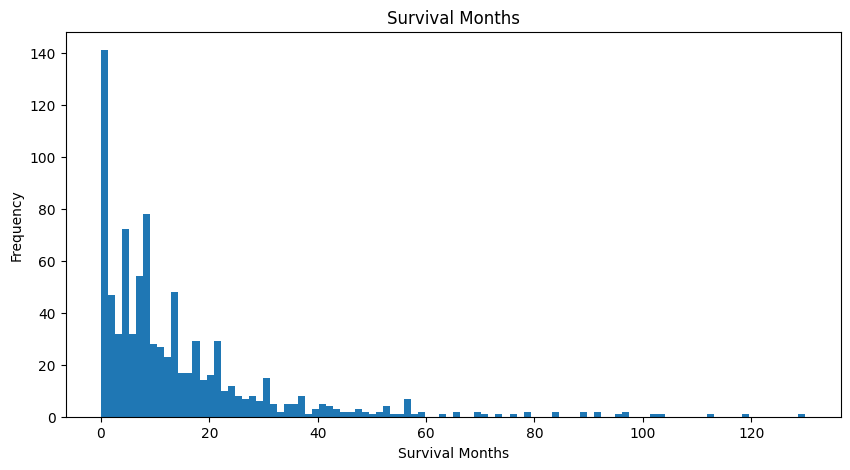

In [240]:
# plot the survival months
df1['Survival months'].plot(kind='hist', bins=100,
                            figsize=(10, 5), title='Survival Months',
                            xlabel='Survival Months', ylabel='Frequency')

<Axes: title={'center': 'Survival Months'}, xlabel='Survival Months', ylabel='Frequency'>

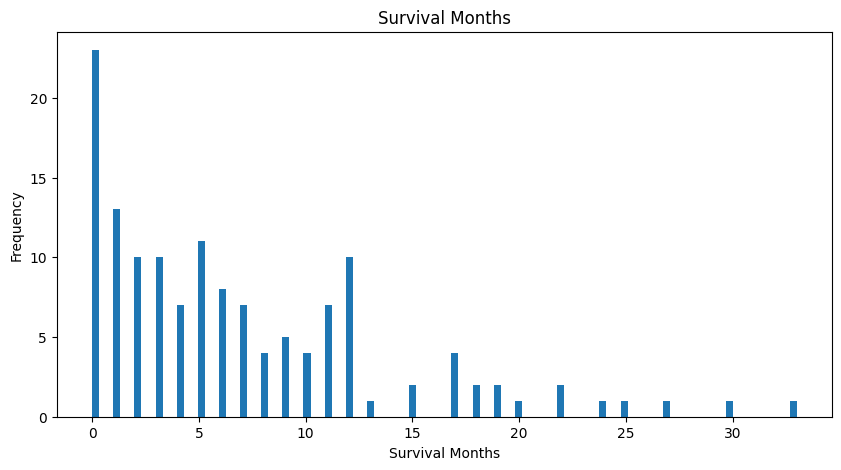

In [241]:
df2['Survival months'].plot(kind='hist', bins=100,
                            figsize=(10, 5), title='Survival Months',
                            xlabel='Survival Months', ylabel='Frequency')

In [242]:
# drop Patient ID,Year of diagnosis, CS tumor size (2004-2015), Tumor Size Summary (2016+)
df1.drop(columns=['Patient ID','Year of diagnosis', 'CS tumor size (2004-2015)'], inplace=True)
df2.drop(columns=['Patient ID','Year of diagnosis', 'Tumor Size Summary (2016+)'], inplace=True)

In [243]:
display(df1.head(2),df2.head(2))

,Radiation recode,Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size
0,0,8,70-74 years,Married,0,White,1,0,T2,N0,M1,IV,25
4,1,19,75-79 years,Married,0,Other,1,0,T1,N0,M0,I,30


,Radiation recode,Survival months,Age,Marital Status,Sex_is_male,Race,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size
1374,1,5,35-54 years,Married,1,White,1,0,T0,N3,M1,4,0
1375,1,25,75-79 years,Single,1,White,1,0,T1,N0,M0,1,20


In [244]:
# save the df to a new csv file called cleaned_data.csv
df1.to_csv('Data/cleaned_data1.csv', index=False)
df2.to_csv('Data/cleaned_data2.csv', index=False)